In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import scipy.linalg as la

import quantecon as qe

In [74]:
# おまじない
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
# olrprobust_3はリカッチのif文を削除した
# olrprobust_2との相違点は上記があるか、ないか
from olrprobust_3_using import olrp,olrprobust,doubleo

# olrprobust_2はリカッチのif文有〼
# matlabを極力そのまま移し替えた。
#from olrprobust_2_using import olrp, olrprobust, doubleo

# olrprobust_1はgithubから
#from olrprobust_1_using import olrp,olrprobust,doubleo

In [76]:
# Set parameters
mu_d = 13.0
rho = 0.05
gan = 8.0
c_d = 1.0
beta = 0.95
R = 1 / beta
# y=[1 d k]のやつ

Q = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 1e-9]])
A = np.array([[1.0, 0.0, 0.0], [(1.0 - rho) * mu_d, rho, 0.0], [-gan, 1.0, R]])
B = np.array([[0.0], [0.0], [1.0]])
C = np.array([[0.0], [c_d], [0.0]])
R_hyouka = np.array([[1]])

In [77]:
#uncertaintyあり、なし全ての期間を決定
iter_t = 150

In [78]:
F_ro2, K_ro2, P_ro2, Pt_ro2 = olrprobust(beta, A, B, C, Q, R_hyouka, -1e-1)
np.random.seed(5)
eps = np.random.randn(iter_t)
#print(eps[100])
y = np.array([[1.0, 0.0, 0.0]])
# print(y[0])
# print(y.shape)
ABF_1 = A - np.dot(B, F_ro2)
for i in range(iter_t):
    # print(i)
    # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    # Tmp = A -np.dot(B,F) + np.dot(C,K)
    # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
    # print(y)
    # print(y.shape)
    y = np.insert(y, 0, np.dot(ABF_1, y[0].T) + C.T * eps[i], axis=0)
    if i == 0:
        y[0][2] = 0

In [79]:
y_1 = y[::-1]
k_get = y_1[:, 2]
d_get = y_1[:, 1]

In [80]:
c = np.zeros(iter_t + 1)
# print("c size before %d"%c.shape)

for i in range(1, iter_t):
    # print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
    # print(i)
    # print(y[i])
    c[i] = F_ro2 @ y_1[i] + gan
    # print("c = %d"%c[i])


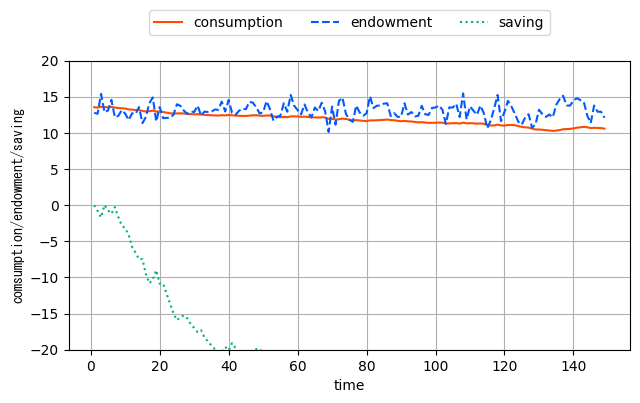

In [81]:
plt.figure(figsize=[6.5, 4.2])
plt.ylim((-20,20))
colorlist = ["#FF4B00", "#005AFF", "#03AF7A"]
# Plot consumption
plt.plot(
    np.array(range(1, iter_t)),
    c[1:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)

# Plot endowment
plt.plot(
    np.array(range(1, iter_t)),
    d_get[1:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
)

# Plot saving
plt.plot(
    np.array(range(1, iter_t)),
    k_get[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)

# Legend with specified arguments
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
plt.xlabel("time", fontsize=10)
plt.ylabel("comsumption/endowment/saving", fontname="MS Gothic", fontsize=10)
plt.grid()
plt.tight_layout()

# plt.axhline(y=gan, xmin=0.0, xmax=iter_t, color="r")

plt.show()